In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creating some data

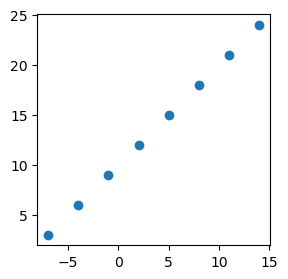

In [2]:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# sns.scatterplot(x = X, y = y)
plt.figure(figsize = (3, 3), dpi = 100)
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
# Demo tensor for housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

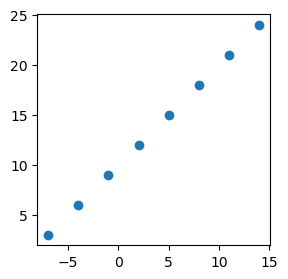

In [14]:
plt.figure(figsize = (3, 3), dpi = 100)
plt.scatter(X, y)

In [15]:
X = tf.expand_dims(X, axis=-1)

In [16]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # We want to take 1 number as input, and 1 as output
])

# Another way to do the same thing
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape = (16,)))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent (it could be optimizer = [sgd])
              metrics = ['mae']) 

# 3. Fit the model
model.fit(X, y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - loss: 9.2190 - mae: 9.2190
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.0865 - mae: 9.0865
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.9540 - mae: 8.9540
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.8215 - mae: 8.8215
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.6890 - mae: 8.6890


In [17]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using uor model
# model.predict(np.array([[17.0]]))
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[23.818245]], dtype=float32)

## Improving model

1. **Creating a model** - add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - fit a model for more epochs or on more data

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 10.6391 - mae: 10.6391
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.5066 - mae: 10.5066
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.3741 - mae: 10.3741
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 10.2416 - mae: 10.2416
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 10.1091 - mae: 10.1091
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.9766 - mae: 9.9766
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.8441 - mae: 9.8441
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.7116 - mae: 9.7116
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.5791 - mae: 9.5791
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.4466 - mae: 9.4466
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.3141 - mae: 9.3141
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.1816 - mae: 9.1816
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [20]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[30.180742]], dtype=float32)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - loss: 11.9877 - mae: 11.9877
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.3569 - mae: 11.3569
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.7081 - mae: 10.7081
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.0426 - mae: 10.0426
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.3509 - mae: 9.3509
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.6321 - mae: 8.6321
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.8780 - mae: 7.8780
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.0701 - mae: 7.0701
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.2071 - mae: 6.2071
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.2831 - mae: 5.2831
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.4145 - mae: 4.4145
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.2719 - mae: 4.2719
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [22]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[31.175322]], dtype=float32)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step - loss: 12.9461 - mae: 12.9461
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.4576 - mae: 12.4576
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.9650 - mae: 11.9650
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.4657 - mae: 11.4657
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.9570 - mae: 10.9570
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.4363 - mae: 10.4363
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.9011 - mae: 9.9011
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.3485 - mae: 9.3485
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.7757 - mae: 8.7757
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.1798 - mae: 8.1798
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.5577 - mae: 7.5577
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.2340 - mae: 7.2340
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [24]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[30.671011]], dtype=float32)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step - loss: 14.5664 - mae: 14.5664
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.4983 - mae: 14.4983
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 14.4302 - mae: 14.4302
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.3621 - mae: 14.3621
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.2940 - mae: 14.2940
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.2260 - mae: 14.2260
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.1580 - mae: 14.1580
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.0900 - mae: 14.0900
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.0220 - mae: 14.0220
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.9540 - mae: 13.9540
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.8861 - mae: 13.8861
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.8181 - mae: 13.8181
Epoch 13/100
1/1 ━━━━━━━

In [27]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[27.019606]], dtype=float32)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])

model.fit(X, y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.7952 - mae: 14.7952
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.0692 - mae: 14.0692
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.3470 - mae: 13.3470
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.6266 - mae: 12.6266
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.9064 - mae: 11.9064
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.1845 - mae: 11.1845
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.4587 - mae: 10.4587
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.7267 - mae: 9.7267
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.9863 - mae: 8.9863
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.2350 - mae: 8.2350
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.4701 - mae: 7.4701
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.6887 - mae: 6.6887
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [29]:
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[26.802708]], dtype=float32)

In [31]:
model.predict(tf.constant([[25.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[34.690063]], dtype=float32)